## Programming Assignment 3:Association Analysis and Deep learning


In [1]:
import os
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as implt
from PIL import Image
import seaborn as sns
from pathlib import Path
import random
import cv2 as cv

#### 1. c ) Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association rules you can extract from your dataset?

In [14]:
from math import nan
groceries_dataset=pd.read_csv('PA3datasetGrocery_Items_63.csv .csv')
groceries_dataset.head()
dataset=groceries_dataset.values.tolist()

# Remove 'nan' values from the nested lists
cleaned_data = [[item for item in sublist if item is not np.nan] for sublist in dataset]
cleaned_data

[['dessert', 'dental care'],
 ['frankfurter', 'tropical fruit'],
 ['other vegetables', 'whipped/sour cream', 'whole milk', 'sugar'],
 ['sausage', 'sugar'],
 ['soda', 'cream cheese'],
 ['tropical fruit', 'soft cheese'],
 ['berries', 'white bread'],
 ['other vegetables', 'dog food'],
 ['citrus fruit', 'waffles', 'female sanitary products'],
 ['whole milk', 'pastry', 'butter', 'whole milk'],
 ['frankfurter', 'baking powder', 'shopping bags'],
 ['coffee', 'frozen fish'],
 ['rolls/buns', 'frozen vegetables'],
 ['sausage',
  'pork',
  'pip fruit',
  'soda',
  'beef',
  'fruit/vegetable juice',
  'root vegetables',
  'berries',
  'misc. beverages'],
 ['tropical fruit', 'flour'],
 ['root vegetables', 'salty snack'],
 ['cat food', 'soda', 'yogurt', 'margarine'],
 ['seasonal products', 'shopping bags'],
 ['sausage', 'specialty bar'],
 ['herbs', 'soda'],
 ['meat', 'fruit/vegetable juice'],
 ['other vegetables', 'shopping bags', 'specialty bar'],
 ['beverages', 'mustard', 'yogurt'],
 ['sausage', '

In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
te= TransactionEncoder()
te_array = te.fit(cleaned_data).transform(cleaned_data)
data = pd.DataFrame(te_array, columns=te.columns_)

In [18]:
frequent_itemsets = apriori(data, min_support = 0.01, use_colnames = True)
#print(frequent_itemsets)
association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(rolls/buns),(other vegetables),0.109875,0.123125,0.011000,0.100114,0.813107,-0.002528,0.974429
1,(other vegetables),(whole milk),0.123125,0.160000,0.015875,0.128934,0.805838,-0.003825,0.964336
2,(rolls/buns),(whole milk),0.109875,0.160000,0.013500,0.122867,0.767918,-0.004080,0.957665
3,(soda),(whole milk),0.096625,0.160000,0.011375,0.117723,0.735770,-0.004085,0.952082
4,(yogurt),(whole milk),0.087000,0.160000,0.011125,0.127874,0.799210,-0.002795,0.963163


(d) Use minimum support values (msv): 0.001, 0.005, 0.01, 0.05 and minimum confidence threshold
(mct): 0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from
the dataset. Construct a heatmap using Seaborn data visualization library (https://seaborn.
pydata.org/generated/seaborn.heatmap.html) to show the count results such that the xaxis is msv and the y-axis is mct. (2.5 points)


<AxesSubplot:xlabel='msv', ylabel='mct'>

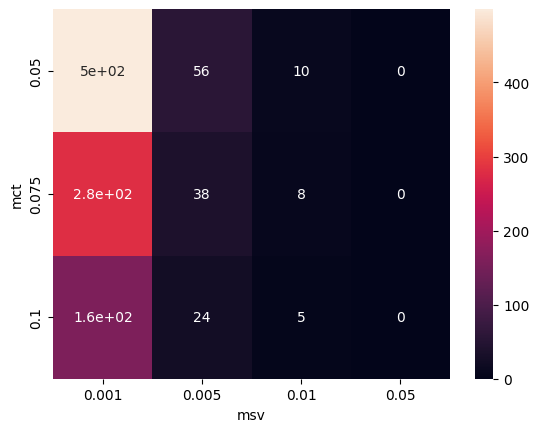

In [28]:
minimum_support_values=[0.001, 0.005, 0.01, 0.05 ]
minimun_confidence_threshold=[0.05, 0.075, 0.1]
min_support=[]
min_conf=[]
count_ar=[]
for msv in minimum_support_values:
    for mct in minimun_confidence_threshold:
        frequent_itemsets=apriori(data,min_support=msv,use_colnames=True)        
        count=len(association_rules(frequent_itemsets,metric='confidence',min_threshold=mct))
        min_support.append(msv)
        min_conf.append(mct)
        count_ar.append(count)

df = pd.DataFrame({'msv': min_support,'mct':min_conf,'count_ar':count_ar})

        
glue =df.pivot(index="mct",columns="msv",values="count_ar")
sns.heatmap(glue,annot=True)

List the association rule(s) (i.e., one or more rules depending on your dataset) that have the highest
confidence for minimum support = 0.005. What is that confidence value?

In [32]:
frequent_itemsets = apriori(data, min_support = 0.005, use_colnames = True)
#print(frequent_itemsets)
association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.0).sort_values(ascending=False,by="confidence")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(frankfurter),(whole milk),0.037000,0.160000,0.006375,0.172297,1.076858,0.000455,1.014857
36,(pip fruit),(whole milk),0.048750,0.160000,0.008375,0.171795,1.073718,0.000575,1.014241
55,(sausage),(whole milk),0.061000,0.160000,0.009750,0.159836,0.998975,-0.000010,0.999805
2,(bottled beer),(whole milk),0.045250,0.160000,0.006875,0.151934,0.949586,-0.000365,0.990489
10,(domestic eggs),(whole milk),0.036375,0.160000,0.005375,0.147766,0.923540,-0.000445,0.985645
...,...,...,...,...,...,...,...,...,...
13,(whole milk),(frankfurter),0.160000,0.037000,0.006375,0.039844,1.076858,0.000455,1.002962
33,(whole milk),(pastry),0.160000,0.048250,0.006250,0.039062,0.809585,-0.001470,0.990439
11,(whole milk),(domestic eggs),0.160000,0.036375,0.005375,0.033594,0.923540,-0.000445,0.997122
15,(whole milk),(newspapers),0.160000,0.036750,0.005125,0.032031,0.871599,-0.000755,0.995125


### Highestconfidence value= 0.172297

In [33]:
breed_paths =  [
    'Images/n02088632-bluetick/',
    'Images/n02093647-Bedlington_terrier/',
    'Images/n02112137-chow/',
    'Images/n02108089-boxer/'
]
# Check if each folder exists and count image files
images=[]
image_path =[]
labels=[]
for folder_path in breed_paths:
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
                file_path = os.path.join(folder_path, file)
                image_path.append(file_path)
                img=cv.imread(file_path)
                images.append(cv.cvtColor(img,cv.COLOR_BGR2GRAY))
                name = folder_path.split('/')
                labels.append(name[1].split('-')[1])
            
print(f"Names of Breeds: {set(labels)}")

Names of Breeds: {'bluetick', 'Bedlington_terrier', 'boxer', 'chow'}


In [36]:
breed_dict={"File_name":image_path,"Image_array":images,"Breed":labels}
breed_df = pd.DataFrame(breed_dict)
print(breed_df['Breed'].value_counts())

chow                  196
Bedlington_terrier    182
bluetick              171
boxer                 151
Name: Breed, dtype: int64


In [48]:
import skimage.transform
resize_image = []
for img in breed_df["Image_array"]:
    resize_image.append(skimage.transform.resize(img, (32, 32)))
img_resize = np.array(resize_image)
image_arr = np.expand_dims(img_resize,-1)

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [50]:
breed_df["Labels"] = breed_df["Breed"].map({"chow": 0, "Bedlington_terrier": 1,"bluetick":2,"boxer":3})
breed_labels = ["chow","Bedlington_terrier","bluetick","boxer"]

In [63]:
x = image_arr
y = breed_df['Labels']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify=y)

In [53]:
X_train.shape

(560, 32, 32, 1)

In [64]:
import tensorflow.keras as keras
y_train = keras.utils.to_categorical(y_train, 4)
y_test = keras.utils.to_categorical(y_test, 4)

In [65]:
y_train.shape

(560, 4)

In [56]:
from tensorflow.keras import layers


C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                28816     
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 68        
Total params: 28,964
Trainable params: 28,964
Non-trainable params: 0
_________________________________________________________________
Train on 560 samples, validate on 140 samples
Epoch 1/20


C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


560/560 [==============================] - 1s 2ms/sample - loss: 1.3889 - accuracy: 0.2625 - val_loss: 1.3779 - val_accuracy: 0.3143
Epoch 2/20
128/560 [=====>........................] - ETA: 0s - loss: 1.3801 - accuracy: 0.3438

C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


560/560 [==============================] - 0s 268us/sample - loss: 1.3713 - accuracy: 0.3607 - val_loss: 1.3723 - val_accuracy: 0.3071
Epoch 3/20
560/560 [==============================] - 0s 248us/sample - loss: 1.3570 - accuracy: 0.3607 - val_loss: 1.3622 - val_accuracy: 0.3571
Epoch 4/20
560/560 [==============================] - 0s 249us/sample - loss: 1.3473 - accuracy: 0.3643 - val_loss: 1.3566 - val_accuracy: 0.3571
Epoch 5/20
560/560 [==============================] - 0s 264us/sample - loss: 1.3367 - accuracy: 0.3607 - val_loss: 1.3531 - val_accuracy: 0.3500
Epoch 6/20
560/560 [==============================] - 0s 249us/sample - loss: 1.3300 - accuracy: 0.3821 - val_loss: 1.3470 - val_accuracy: 0.3786
Epoch 7/20
560/560 [==============================] - 0s 253us/sample - loss: 1.3196 - accuracy: 0.3804 - val_loss: 1.3557 - val_accuracy: 0.3071
Epoch 8/20
560/560 [==============================] - 0s 263us/sample - loss: 1.3149 - accuracy: 0.3661 - val_loss: 1.3411 - val_accura

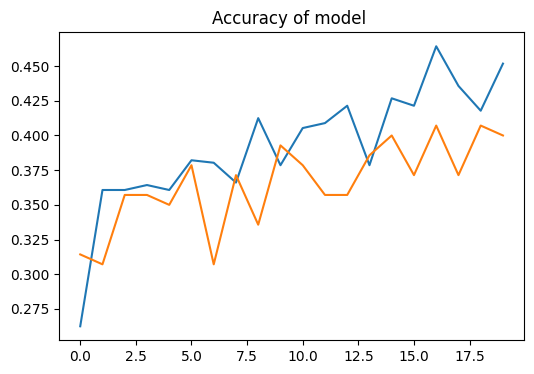

In [71]:
input_shape=X_train[0].shape
num_classes=4
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(16,activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test,y_test))

plt.figure(figsize=(6,4))
plt.plot(model.history.history['accuracy'],label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy of model ')
plt.show()

model might be overfitting ,but just right too

9164387 : banner id
    
     Train the CNN using 2 other number of nodes in the hidden layer (iv): 8 and 32 with all other
parameters unchanged

C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 14408     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 36        
Total params: 14,524
Trainable params: 14,524
Non-trainable params: 0
_________________________________________________________________
Train on 560 samples, validate on 140 samples
Epoch 1/20


C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


560/560 [==============================] - 1s 2ms/sample - loss: 1.3837 - accuracy: 0.2714 - val_loss: 1.3761 - val_accuracy: 0.2929
Epoch 2/20
128/560 [=====>........................] - ETA: 0s - loss: 1.3734 - accuracy: 0.3047

C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


560/560 [==============================] - 0s 253us/sample - loss: 1.3760 - accuracy: 0.2839 - val_loss: 1.3713 - val_accuracy: 0.2786
Epoch 3/20
560/560 [==============================] - 0s 256us/sample - loss: 1.3713 - accuracy: 0.2804 - val_loss: 1.3675 - val_accuracy: 0.2786
Epoch 4/20
560/560 [==============================] - 0s 282us/sample - loss: 1.3672 - accuracy: 0.2804 - val_loss: 1.3669 - val_accuracy: 0.2786
Epoch 5/20
560/560 [==============================] - 0s 281us/sample - loss: 1.3628 - accuracy: 0.2911 - val_loss: 1.3646 - val_accuracy: 0.2929
Epoch 6/20
560/560 [==============================] - 0s 259us/sample - loss: 1.3571 - accuracy: 0.3089 - val_loss: 1.3608 - val_accuracy: 0.2857
Epoch 7/20
560/560 [==============================] - 0s 269us/sample - loss: 1.3490 - accuracy: 0.3161 - val_loss: 1.3572 - val_accuracy: 0.3071
Epoch 8/20
560/560 [==============================] - 0s 269us/sample - loss: 1.3435 - accuracy: 0.3089 - val_loss: 1.3536 - val_accura

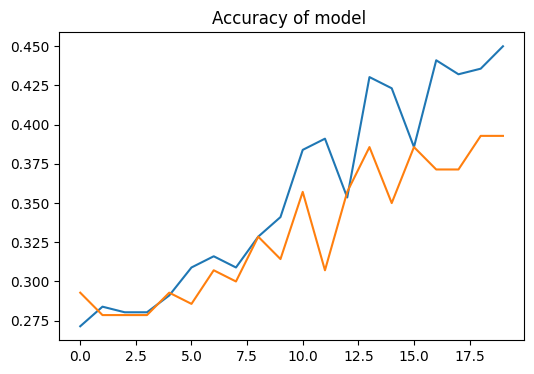

In [69]:
input_shape=X_train[0].shape
num_classes=4
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(8,activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test,y_test))

plt.figure(figsize=(6,4))
plt.plot(model.history.history['accuracy'],label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy of model ')
plt.show()

model might be overfitting

C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                57632     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 132       
Total params: 57,844
Trainable params: 57,844
Non-trainable params: 0
_________________________________________________________________
Train on 560 samples, validate on 140 samples
Epoch 1/20


C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


560/560 [==============================] - 2s 3ms/sample - loss: 1.3825 - accuracy: 0.2464 - val_loss: 1.3615 - val_accuracy: 0.3429


C:\Users\dharo\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


Epoch 2/20
560/560 [==============================] - 0s 285us/sample - loss: 1.3530 - accuracy: 0.3607 - val_loss: 1.3447 - val_accuracy: 0.3214
Epoch 3/20
560/560 [==============================] - 0s 286us/sample - loss: 1.3205 - accuracy: 0.3875 - val_loss: 1.3337 - val_accuracy: 0.3571
Epoch 4/20
560/560 [==============================] - 0s 290us/sample - loss: 1.3016 - accuracy: 0.4000 - val_loss: 1.3186 - val_accuracy: 0.3786
Epoch 5/20
560/560 [==============================] - 0s 276us/sample - loss: 1.2842 - accuracy: 0.4125 - val_loss: 1.3168 - val_accuracy: 0.3571
Epoch 6/20
560/560 [==============================] - 0s 289us/sample - loss: 1.2881 - accuracy: 0.3821 - val_loss: 1.3008 - val_accuracy: 0.3714
Epoch 7/20
560/560 [==============================] - 0s 286us/sample - loss: 1.2619 - accuracy: 0.4179 - val_loss: 1.2956 - val_accuracy: 0.3929
Epoch 8/20
560/560 [==============================] - 0s 292us/sample - loss: 1.2441 - accuracy: 0.4411 - val_loss: 1.3022 -

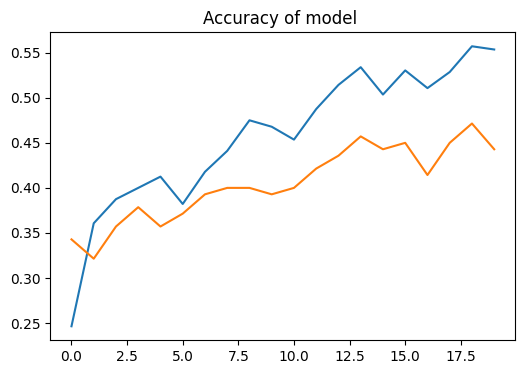

In [70]:
input_shape=X_train[0].shape
num_classes=4
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(32,activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test,y_test))

plt.figure(figsize=(6,4))
plt.plot(model.history.history['accuracy'],label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy of model ')
plt.show()

model is overfitting

In [72]:
# reference:
# https://www.geeksforgeeks.org/image-resizing-using-opencv-python
# https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv
# https://www.tutorialspoint.com/how-to-normalize-an-image-in-opencv-python
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://keras.io/examples/vision/mnist_convnet/
#https://rasbt.github.io/mlxtend/